Citations: Andrew Lucas: Ising formulations of many NP Problems. arXiv:1302.5843. 
https://arxiv.org/abs/1302.5843

Ising machine: Travelling Salesman Problem


In [ ]:
%pip install numba
%pip install scipy
%pip install SciencePlots
%pip install matplotlib
%pip install numpy 

In [3]:
import numpy as np
import scienceplots
import matplotlib.pyplot as plt
import numba


In [4]:
import math 
import numpy as np
vertices = [
    ('A', 'Melbourne',   -37.8136, 144.9631),
    ('B', 'Shanghai',     31.2304, 121.4737),
    ('C', 'Suzuka',       34.8821, 136.5882),
    ('D', 'Sakhir',       26.0325, 50.5109),
    ('E', 'Jeddah',       21.5433, 39.1728),
    ('F', 'Miami',        25.7617, -80.1918),
    ('G', 'Imola',        44.3559, 11.7161),
    ('H', 'Monaco',       43.7384, 7.4246),
    ('I', 'Montmelo',     41.5503, 2.2500),
    ('J', 'Montreal',     45.5017, -73.5673),
    ('K', 'Spielberg',    47.2173, 14.7772),
    ('L', 'Silverstone',  52.0786, -1.0169),
    ('M', 'Stavelot',     50.3941, 6.0169),
    ('N', 'Mogyorod',     47.5980, 19.2506),
    ('O', 'Monza',        45.5845, 9.2744),
    ('P', 'Baku',         40.4093, 49.8671),
    ('Q', 'Zandvoort',    52.3740, 4.5312),
    ('R', 'Singapore',     1.3521, 103.8198),
    ('S', 'Texas',        30.2672, -97.7431),
    ('T', 'Mexico City',  19.4326, -99.1332),
    ('U', 'Sao Paulo',    -23.5505, -46.6333),
    ('V', 'Las Vegas',    36.1699, -115.1398),
    ('W', 'Abu Dhabi',    24.4539, 54.3773),
    ('X', 'Lusail',       25.4693, 51.4825)
]
EARTH_RADIUS = 6371.0

# Helper function to compute haversine distance
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert lat/lons to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = (math.sin(dlat / 2)**2) + math.cos(lat1) * math.cos(lat2) * (math.sin(dlon / 2)**2)
    c = 2 * math.asin(math.sqrt(a))

    return EARTH_RADIUS * c

def get_normalized_weight_matrix():
    weights = np.zeros((len(vertices), len(vertices)))
    for i in range(len(vertices)):
        for j in range(len(vertices)):
            if i == j: 
                weights[i][j] = 0
            else:
                code_i, name_i, lat_i, lon_i = vertices[i]
                code_j, name_j, lat_j, lon_j = vertices[j]
                dist_km = round(haversine_distance(lat_i, lon_i, lat_j, lon_j))
                weights[i][j] = dist_km
    
    # Normalize the weights, ignoring the diagonal which is 0 
    
    max_weight = np.max(weights)
    min_weight = np.min(weights[weights != 0])  # Ignore the diagonal (0s)

    range_weight = max_weight - min_weight

    for i in range(len(weights)):
        for j in range(len(weights)):
            if i != j:
                weights[i][j] = (weights[i][j] - min_weight) / range_weight
            else:
                weights[i][j] = 0
    
    
    weights = np.round(weights, 5)
            
    return weights


get_normalized_weight_matrix()




array([[0.     , 0.42681, 0.43078, 0.64486, 0.68217, 0.83184, 0.85845,
        0.87651, 0.89812, 0.8935 , 0.84721, 0.90468, 0.88114, 0.82942,
        0.86931, 0.69195, 0.88463, 0.31971, 0.76168, 0.72286, 0.69722,
        0.69991, 0.62228, 0.63862],
       [0.42681, 0.     , 0.07247, 0.361  , 0.42853, 0.70733, 0.4782 ,
        0.49519, 0.52099, 0.60389, 0.45804, 0.48825, 0.47497, 0.44143,
        0.48218, 0.33579, 0.47186, 0.19838, 0.64002, 0.6877 , 0.99183,
        0.55712, 0.34547, 0.35751],
       [0.43078, 0.07247, 0.     , 0.42691, 0.49352, 0.65174, 0.5097 ,
        0.52454, 0.54884, 0.56239, 0.48847, 0.50476, 0.49729, 0.47385,
        0.51105, 0.38842, 0.49143, 0.26472, 0.57465, 0.61669, 1.     ,
        0.48718, 0.41369, 0.42412],
       [0.64486, 0.361  , 0.42691, 0.     , 0.06129, 0.64948, 0.20983,
        0.22665, 0.24708, 0.5454 , 0.20397, 0.27106, 0.243  , 0.18891,
        0.22182, 0.07978, 0.25208, 0.33348, 0.68733, 0.74587, 0.62819,
        0.68926, 0.01672, 0.     ],
    

In [5]:

# initiate random grid of spins (1 and 0)

def init_random():
    N = len(vertices)
    spins = np.random.randint(2, size=(N, N))
    return spins
    

init_random()

array([[0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 1],
       [0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1],
       [0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
        0, 0],
       [0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 1],
       [0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
        0, 1],
       [1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 1],
       [1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0],
       [1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 1],
       [0, 1, 1, 0, 0

In [6]:
# get letter for each city
def get_code(num):
    return chr(num + 65)

In [7]:
@numba.njit
def get_energy(lattice, A, B, weights):

    N = len(lattice)
    
    # first term: penalise energy for cities which appear more than once 
    vertex_penalty = 0
    for u in range(N):
        # count the number of 1s in each row
        row_sum = np.sum(lattice[u])
        # if there is more than one 1, add penalty to energy
        if row_sum != 1:
            vertex_penalty += A * (1 -row_sum)**2
    
    # second term: penalise energy for positions which have more than one city in them

    position_penalty = 0
    for j in range(N):
        col_sum = np.sum(lattice[:, j])
        if col_sum != 1:
            position_penalty += A * (1 - col_sum)**2




    # third term: penalise energy for vertices not connected. 
    # all vertices area allowed to be connected here, so we leave this one out for now 

    # fourth term: penalise energy for distance between vertices
    # for each city, from the second one, find the distance from the previous city. 
    
    distance_penalty = 0
    # find vertex visited in the first columm, should be 1
    for vertex in range(N):
        if lattice[vertex][0] == 1:
            prev_vertex = vertex
            first_vertex = vertex
            break
    # go through each column, starting with second one
    for col in range (1, N):
        for vertex in range(N):
            if lattice[vertex][col] == 1:
                curr_vertex = vertex
                weight = weights[prev_vertex][curr_vertex]
                distance_penalty += weight
                prev_vertex = curr_vertex
                break
    # add distance between last and first vertex
    weight = weights[prev_vertex][first_vertex]
    distance_penalty += weight
    # multiply by B
    distance_penalty *= B
    # add all penalties
    energy = vertex_penalty + position_penalty + distance_penalty
    return energy

# test
A = 10000
B = 0.1
lattice = init_random()
weights = get_normalized_weight_matrix()
energy = get_energy(lattice, A, B, weights)



 

In [8]:
# now we apply metropolis

from numba import types, typed
import matplotlib.animation as animation

@numba.njit("Tuple((i8[:,:], f8, ListType(f8[:]),ListType(f8[:])))(i8[:,:], i8, f8,f8,f8,f8[:,:],f8)", nopython=True, parallel=True, fastmath=True, nogil=True)
def metropolis(lattice, num_steps, temperature, energy, alpha, weights, min_temp):
    
    N = len(lattice)

    # create a copy of the lattice
    lattice = lattice.copy()

    # calculate num of needed steps
    needed_temp_steps = int(np.log(min_temp / temperature) / np.log(alpha))
    total_spins = typed.List.empty_list(types.float64[:])
    total_energy = typed.List.empty_list(types.float64[:])



    
    net_spins = np.zeros(num_steps-1)
    net_energy = np.zeros(num_steps-1)
    for step in range(num_steps):

        # choose two random vertices (cities) to swap 
        # i = np.random.randint(0, N)
        # j = np.random.randint(0, N)
        # swap the vertices
        # lattice[i][j], lattice[j][i] = lattice[j][i], lattice[i][j]

        # instead of choose two random vertices to swap, pick a random vertex at a destination and flip it. 
        i = np.random.randint(0, N)
        j = np.random.randint(0, N)
        lattice[i][j] = 1 - lattice[i][j]

        new_energy = get_energy(lattice, A, B, weights)
        delta_energy = new_energy - energy
        # if the new energy is lower, accept the move
        if delta_energy < 0:
                lattice = np.copy(lattice)
                energy = new_energy
        else:
            # if new energy is higher accept the move with probability p
            # the higer the temperature is the higher the 
            p = np.exp(-delta_energy / temperature)
            if np.random.rand() < p:
                lattice = np.copy(lattice)
                energy = new_energy
            else:
                # revert to old lattice
                lattice[i][j] = 1 - lattice[i][j]
        # calculate the net spins and energy
        net_spins[step] = np.sum(lattice)
        net_energy[step] = energy

        
        
        
        # decrease the temperature
        # temperature *= alpha
        # store the net spins and energy 
        total_spins.append(net_spins)
        total_energy.append(net_energy)
        # decrease the needed steps
        # needed_temp_steps -= 1

    return lattice, energy, total_spins, total_energy

lattice = init_random()
weights = get_normalized_weight_matrix()
energy = get_energy(lattice, A, B, weights)
temperature = 0.001
alpha = 0.9
num_steps = 100000000
num_steps_low = 1000
min_temp = 0.1
lattice = lattice.astype(np.int64)
weights = weights.astype(np.float64)
lattice, energy, total_spins, total_energy = metropolis(lattice, num_steps, temperature, energy, alpha, weights, min_temp)


print(lattice)
print(energy)
# print(total_spins)
# print(total_energy)




/Users/aliya/DIMPLE/isingmodel/.venv/lib/python3.11/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
# get the vertices in order of visit from the lattice
def get_order(lattice):
    N = len(lattice)
    order = []
    for col in range(N):
        for row in range(N):
            if lattice[row][col] == 1:
                order.append(row)
    return order

# list of names of cities
def get_city_names(order):
    names = []
    for i in order:
        names.append(vertices[i][1])
    return names

order = get_order(lattice)
city_names = get_city_names(order)
   
print(city_names)

# get total distance of the path
def get_total_distance(order):
    # find not normalized distance between consecutive places in the order
    total_distance = 0
    for i in range(len(order)-1):
        total_distance += haversine_distance(vertices[order[i]][2], vertices[order[i]][3], vertices[order[i+1]][2], vertices[order[i+1]][3])
    # add distance between last and first city
    total_distance += haversine_distance(vertices[order[0]][2], vertices[order[0]][3], vertices[order[-1]][2], vertices[order[-1]][3])
    return total_distance

total_distance = get_total_distance(order)
print(total_distance)

['Montmelo', 'Baku', 'Shanghai', 'Sakhir', 'Monaco', 'Abu Dhabi', 'Spielberg', 'Las Vegas', 'Montreal', 'Stavelot', 'Monza', 'Lusail', 'Suzuka', 'Mogyorod', 'Silverstone', 'Melbourne', 'Mexico City', 'Miami', 'Singapore', 'Jeddah', 'Sao Paulo', 'Texas', 'Zandvoort', 'Imola']
158228.71483999325


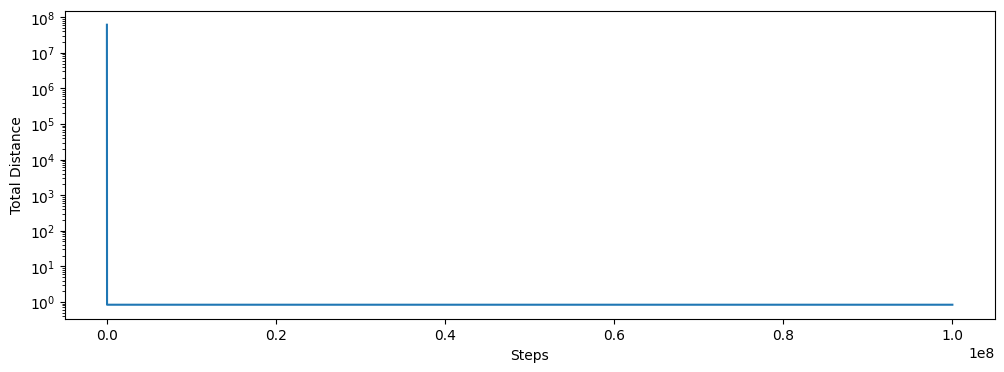

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1024e9b50>>
Traceback (most recent call last):
  File "/Users/aliya/DIMPLE/isingmodel/.venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [ ]:
def plot_distance_first_temp(total_energy):
    fig, axes = plt.subplots(1, 1, figsize=(12, 4)) 
    first_temp = total_energy[0]
    axes.set_yscale('log')
    axes.plot(first_temp)

    axes.set_xlabel('Steps')
    axes.set_ylabel('Total Distance')
    plt.show()

plot_distance_first_temp(total_energy)
# print the full array total_energy[0]
np.set_printoptions(threshold=np.inf)
print(total_energy[0])
